In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
benign_0__mal_1          569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

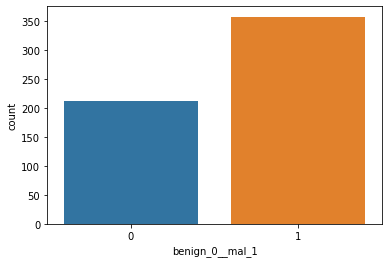

In [5]:
sns.countplot(x='benign_0__mal_1',data = df)

<AxesSubplot:>

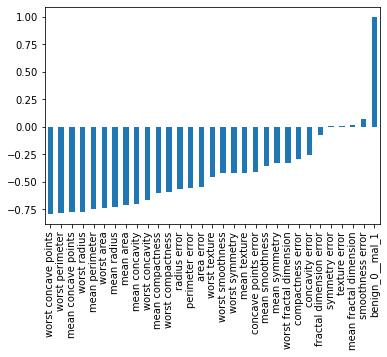

In [6]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar') 

<AxesSubplot:>

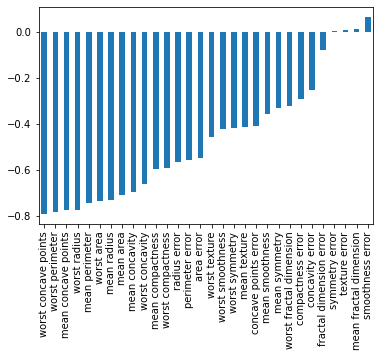

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar') 

<AxesSubplot:>

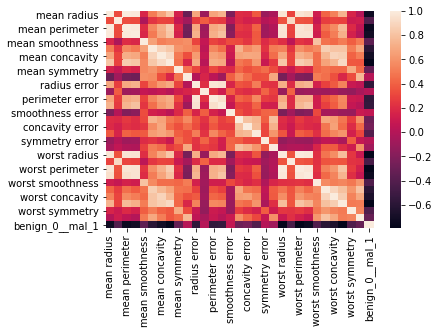

In [8]:
sns.heatmap(df.corr())

In [9]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [17]:
X_train.shape

(426, 30)

In [18]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam')

In [19]:
model.fit(x=X_train,y=y_train,epochs = 600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 2s 63ms/step - loss: 0.6876 - val_loss: 0.6550
Epoch 2/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6368 - val_loss: 0.6091
Epoch 3/600
14/14 [==============================] - 0s 17ms/step - loss: 0.5880 - val_loss: 0.5625
Epoch 4/600
14/14 [==============================] - 0s 20ms/step - loss: 0.5387 - val_loss: 0.5010
Epoch 5/600
14/14 [==============================] - 0s 29ms/step - loss: 0.4754 - val_loss: 0.4292
Epoch 6/600
14/14 [==============================] - 0s 26ms/step - loss: 0.4213 - val_loss: 0.3772
Epoch 7/600
14/14 [==============================] - 0s 30ms/step - loss: 0.3678 - val_loss: 0.3316
Epoch 8/600
14/14 [==============================] - 0s 18ms/step - loss: 0.3239 - val_loss: 0.2955
Epoch 9/600
14/14 [==============================] - 0s 24ms/step - loss: 0.2805 - val_loss: 0.2689
Epoch 10/600
14/14 [==============================] - 0s 23ms/step - loss: 0.2795 - val_loss: 0.2443

In [20]:
losses = pd.DataFrame(model.history.history)

In [21]:
losses

loss  val_loss
0    0.676771  0.655029
1    0.628464  0.609129
2    0.581867  0.562466
3    0.530130  0.500951
4    0.459610  0.429196
..        ...       ...
595  0.011055  0.280616
596  0.015996  0.268614
597  0.011163  0.305665
598  0.010956  0.256497
599  0.010968  0.338771

[600 rows x 2 columns]

In [22]:
losses.plot()

<AxesSubplot:>

In [23]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam')

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [26]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [27]:
model.fit(x=X_train,y=y_train,epochs = 600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 35ms/step - loss: 0.6880 - val_loss: 0.6474
Epoch 2/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6484 - val_loss: 0.6151
Epoch 3/600
14/14 [==============================] - 0s 22ms/step - loss: 0.6080 - val_loss: 0.5818
Epoch 4/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5793 - val_loss: 0.5471
Epoch 5/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5386 - val_loss: 0.5057
Epoch 6/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5020 - val_loss: 0.4644
Epoch 7/600
14/14 [==============================] - 0s 16ms/step - loss: 0.4691 - val_loss: 0.4242
Epoch 8/600
14/14 [==============================] - 0s 17ms/step - loss: 0.4252 - val_loss: 0.3821
Epoch 9/600
14/14 [==============================] - 0s 19ms/step - loss: 0.3910 - val_loss: 0.3447
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.3436 - val_loss: 0.3145

In [28]:
model_loss = pd.DataFrame(model.history.history)

In [29]:
model_loss.plot()

<AxesSubplot:>

In [30]:
from tensorflow.keras.layers import Dropout

In [33]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam')

In [34]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 49ms/step - loss: 0.6891 - val_loss: 0.6665
Epoch 2/600
14/14 [==============================] - 0s 25ms/step - loss: 0.6607 - val_loss: 0.6484
Epoch 3/600
14/14 [==============================] - 0s 35ms/step - loss: 0.6498 - val_loss: 0.6270
Epoch 4/600
14/14 [==============================] - 0s 30ms/step - loss: 0.6334 - val_loss: 0.6032
Epoch 5/600
14/14 [==============================] - 0s 17ms/step - loss: 0.6042 - val_loss: 0.5723
Epoch 6/600
14/14 [==============================] - 0s 24ms/step - loss: 0.5913 - val_loss: 0.5401
Epoch 7/600
14/14 [==============================] - 0s 28ms/step - loss: 0.5641 - val_loss: 0.5097
Epoch 8/600
14/14 [==============================] - 0s 20ms/step - loss: 0.5078 - val_loss: 0.4749
Epoch 9/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5344 - val_loss: 0.4478
Epoch 10/600
14/14 [==============================] - 0s 15ms/step - loss: 0.4859 - val_loss: 0.4231

In [35]:
model_loss = pd.DataFrame(model.history.history)

In [36]:
model_loss.plot()

<AxesSubplot:>

In [37]:
predictions = model.predict_classes(X_test)

/home/rushi/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [40]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
